<a href="https://colab.research.google.com/github/moumita14/Stack-Overflow-Survey-Analysis/blob/master/Data_Science_Blog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2019 Stack Overflow Survey Analysis**

Stack Overflow is a major resource for programmers worldwide looking for answers to technical questions. Stack Exchange Inc. has been doing an annual Developer Survey taken by users all over the world through social media, emails, ads, text messages etc. It is considered the largest and most comprehensive survey of software developers. In this notebook we will dive into the dataset and try to find out some interesting revelations. 


**Business Case**

One of the pressing issues in IT industry is the increasing attrition rate of employees. This could be attributed to the employee satisfaction level. In this notebook, we are going to explore employee satisfaction level and what are the contributing factors. Apart from job satistion, another reason employees leave the company is due to their stagnant salary. We will also explore which developers earn more. 

We will answser the following questions in this notebook:

1.   **Which country has the highest job satisfaction for developers ?**
2.   **Variation in job satisfaction between developers who have a formal IT education vs those with major in non-IT field?**
3.   **How does company size influence the job satisfaction of developers?**
4.   **Do developers who contribute to open source have higher salary than those who are not ?**






## Import Data

For this project, I'm using the 2019 Stack Overflow Annual Developer Survey, which can be found [here](https://insights.stackoverflow.com/survey).


I have stored the data in my google drive and used google colab for the project as shown in the next few cells.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Now my drive is mounted in colab, I will store the data in dataframe. But before that I will import all the necessary libraries. 

## Import Libraries

In [2]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=1637134425152762ef741a5ffa2c06ffb77103d1f47a77271894e2916c9480d6
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [3]:
import pandasql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap


import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#Copying the path of the csv file
path = '/content/gdrive/My Drive/survey_results_public.csv'

In [7]:
#Import the dataset
data = pd.read_csv(path)

## Exploratory Analysis

In [8]:
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never

In [9]:
# Determine how many rows and columns are in the dataset
data.shape

(88883, 85)

In [10]:
# Get a complete list of columns in the dataset
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [11]:
# Take a look at the kind of information in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [12]:
# Take a look at the numerical data
data.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


**Key Takeaways**

The numbers for total monetary compensation in CompTotal run from 0 to ten quadrillion, so that would be the reason why the ConvertedComp column is used to store the reported compensation values in USD. The yearly earnings in the ConvertedComp column range from nothing to 2,000,000 USD, with the mean compensation being close to 127,000 USD per year. The respondents report working a steady average of 40 hours per week, and spending an average of 5 hours a week on reviewing code. The ages of the respondents range from 1 year (which likely means some data are fake) to 99 years (possible, but doubtful) and their mean age is 30.

In [13]:
# Check if there are any duplicate rows in the dataset
data.duplicated().sum()

0

There are no duplicate data present

In [14]:
# Examine the software development experience of the respondents
data.MainBranch.value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

The majority of the respondents report being professional software developers, a significant number are just learning to code. The rest write code as part of other jobs, as a hobby, or no longer work as developers.

In [15]:
# Examine the employment status of the respondents
data.Employment.value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
Retired                                                   358
Name: Employment, dtype: int64

The majority of the respondents have full time job.

### Data Preparation

For preparing the dataset for the project I did the following:

*   I filtered the data so that it only contains developer responses.
*   JobSat column is categorical data, so I filled N/A values with the mode. 
*   There is a difference in salary range that depends on which country the developers live in, so filled the N/A values in ConvertedComp with the average salary of the developer's Country. 
*   Dropped the remaining N/A values (19 rows) because there are countries with average ConvertedComp = NaN 
*   The JobSat and OpenSourcer columns were set into categorical data type.
















In [16]:
# Filter the data so it only contains the survey result by the developer
developer_data = data[data['MainBranch'] == 'I am a developer by profession']

# Fill the N/A values in JobSat column with the mode
developer_data['JobSat'] = developer_data['JobSat'].fillna(developer_data['JobSat'].mode()[0])

# Fill the N/A values in ConvertedComp column with the mean of each country
salary_per_country = developer_data.groupby('Country')['ConvertedComp'].mean()
developer_data['ConvertedComp'] = developer_data.apply(lambda x: salary_per_country[x['Country']] if pd.isnull(x['ConvertedComp']) else x['ConvertedComp'], axis=1)
developer_data = developer_data.dropna(subset=['ConvertedComp'])

# Set the JobSat and OpenSourcerr column into categorical data type so it will be sorted with the right order (ordinal data)
developer_data['JobSat'] = pd.Categorical(developer_data['JobSat'], categories=['Very dissatisfied',
                                                                                'Slightly dissatisfied',
                                                                                'Neither satisfied nor dissatisfied',
                                                                                'Slightly satisfied',
                                                                                'Very satisfied'], ordered=True)

developer_data['OpenSourcer'] = pd.Categorical(developer_data['OpenSourcer'], categories=['Never',
                                                                                'Less than once per year',
                                                                                'Less than once a month but more than once per year',
                                                                                'Once a month or more often'], ordered=True)

**1. Country with the highest job satisfaction**


In [17]:
# Filtered the data so it only contains the survey result from the top 30 country based on the total respondents
top_30_country = list(developer_data['Country'].value_counts().head(30).index)
filtered_developer_data = developer_data[developer_data['Country'].isin(top_30_country)]

# Aggregate the data so we can visualize it later
aggregated_data = filtered_developer_data.groupby(['Country','JobSat'], as_index=False)['Respondent'].count()

# Add column percentage
total_respondents_per_country = filtered_developer_data['Country'].value_counts()

aggregated_data['Respondent Percentage'] = aggregated_data \
                                           .apply(lambda x: x['Respondent'] / total_respondents_per_country[x['Country']], axis=1) \
                                           .round(3)

# Pivot the data
aggregated_data = aggregated_data[['Country', 'JobSat', 'Respondent Percentage']]
pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Country', columns='JobSat') \
                 .sort_values('Very satisfied', ascending=False)

The data contains the respondent from more than 170 countries but we limit it to 30 countries. We wanted as much data from each country so we chose those countries which have a minimum of 400 respondents.

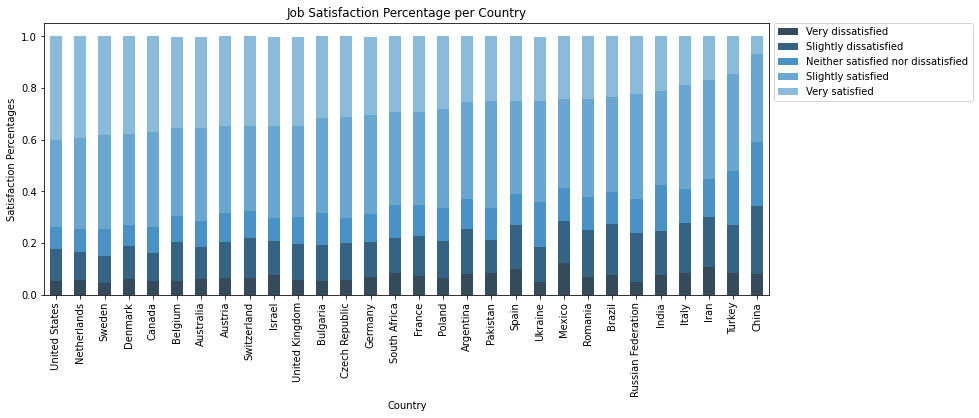

In [18]:
# Visualize the data
pivoted_data.plot(kind='bar', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("Blues_d")),
                  figsize=(13,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('Satisfaction Percentages')
plt.title('Job Satisfaction Percentage per Country')
plt.show()

According to the graph, United States has the highest job satisfaction with 40% respondent voting for it. Another interesting insight is that amomng the top 10 countries in terms of job satisfaction, Europe is home to 5 of those countries. 

**2. Job satisfaction according to Undergraduate Major**

In [19]:
# Create a new columns to flag each respondent if their major is related or not
def check_major(value):
    '''
    input: the value of each row in the selected column
    output: the mapped value based on the rule we made in this function
    '''

    if value == 'Computer science, computer engineering, or software engineering' \
    or value == 'Information systems, information technology, or system administration' \
    or value == 'Web development or web design':
        return 'IT Related'
    return 'Not IT Related'

developer_data['Major'] = developer_data['UndergradMajor'].apply(check_major)

developer_data['Major'].value_counts(normalize=True)

IT Related        0.708178
Not IT Related    0.291822
Name: Major, dtype: float64

I cateogrized the UndergradMajor column into two types (IT Related and Not IT Related). It shows that 29% of developers do not have a formal educaction in IT related domain.

In [20]:
# Aggregate the data so we know how many respondents in each major (IT related or not IT related)
aggregated_data = developer_data.groupby(['Major','JobSat'], as_index=False)['Respondent'].count()

# Add column percentage
total_respondents_per_major = developer_data['Major'].value_counts()

aggregated_data['Respondent Percentage'] = aggregated_data \
                                           .apply(lambda x: x['Respondent'] / total_respondents_per_major[x['Major']], axis=1) \
                                           .round(4)

# Pivot the data
aggregated_data = aggregated_data[['Major', 'JobSat', 'Respondent Percentage']]
pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Major', columns='JobSat')

I calculated the percentages of each value in JobSat to measure the job satisfaction for each major type.

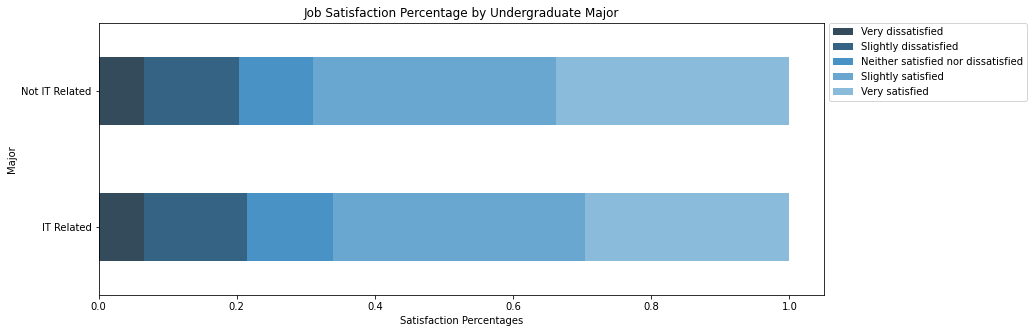

In [21]:
pivoted_data.plot(kind='barh', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("Blues_d")),
                  figsize=(13,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.xlabel('Satisfaction Percentages')
plt.title('Job Satisfaction Percentage by Undergraduate Major')
plt.show()


In [22]:
pivoted_data

JobSat,Very dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Very satisfied
Major,,,,,
IT Related,0.0661,0.1493,0.1239,0.3641,0.2966
Not IT Related,0.0664,0.1363,0.1070,0.3527,0.3376


The above data visualizations conclude that developers whose undergraduate major is not IT-related(34%) have slightly better job satisfaction compared those who have IT related background(30%)

**3. Job Satisfaction based on Organization Size**

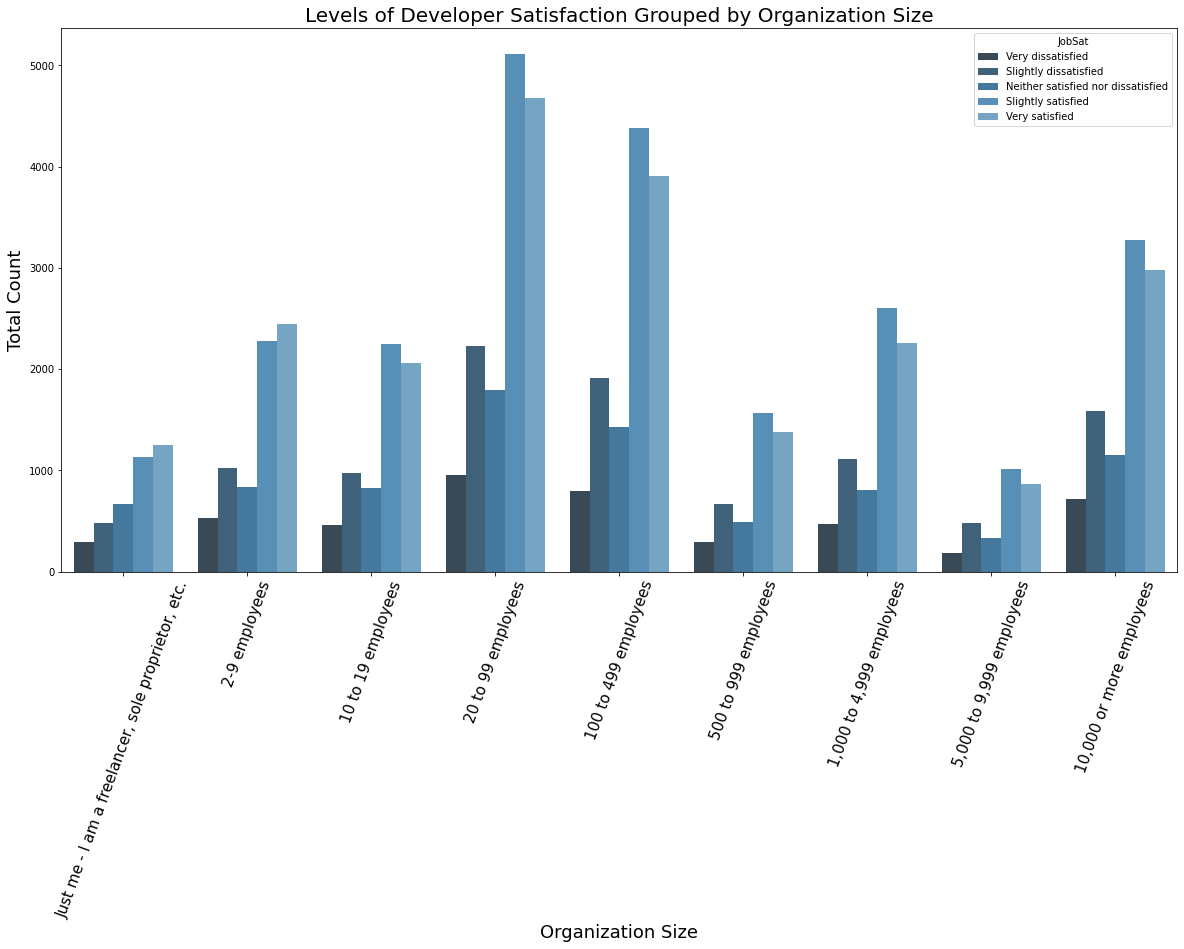

In [23]:
# Make a new dataframe that drops all rows with null values in the OrgSize and JobSat columns
df2 = data.dropna(subset=['OrgSize', 'JobSat'], axis=0)

# Make a clustered bar chart of job satisfaction grouped by organization size
palette={'Very dissatisfied':'orangered', 'Slightly dissatisfied':'yellow',
         'Neither satisfied nor dissatisfied':'chartreuse', 'Slightly satisfied':'deepskyblue',
         'Very satisfied':'blueviolet'}
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(ax=ax, x='OrgSize', hue='JobSat', data=df2,
              order=["Just me - I am a freelancer, sole proprietor, etc.", 
                     "2-9 employees", "10 to 19 employees", "20 to 99 employees", 
                     "100 to 499 employees", "500 to 999 employees", 
                     "1,000 to 4,999 employees", "5,000 to 9,999 employees", 
                     "10,000 or more employees"],
              hue_order=['Very dissatisfied', 'Slightly dissatisfied',
                        'Neither satisfied nor dissatisfied',
                        'Slightly satisfied', 'Very satisfied'],
              #palette=palette
              palette=sns.color_palette("Blues_d"))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=70)
ax.set_title('Levels of Developer Satisfaction Grouped by Organization Size', fontsize=20)
ax.set_xlabel('Organization Size', fontsize=18)
ax.set_ylabel('Total Count', fontsize=18);

Out of the 9 different organization sizes, freelancers/sole proprietors and people in companies of 2-9 employees report the highest job satisfaction. It can be seen the sole proprietors category has the least proportion of unsatisfaction and has a higher number of "neutral" votes. We can say that sole proprietors are comparatively less unsatisfied.

However, the "very satisfied" and "slighty satisfied"  reached the peak for respondents in organization with 20-99  employees and from 100-499 employees. 


**4. Compensation and contributing to open source**

In [24]:
# Aggregate the data
comp_per_category = developer_data.groupby('OpenSourcer', as_index=False)['ConvertedComp'].mean()

comp_per_category

,OpenSourcer,ConvertedComp
0,Never,117254.369170
1,Less than once per year,120802.882927
2,Less than once a month but more than once per ...,123194.248789
3,Once a month or more often,123881.913894


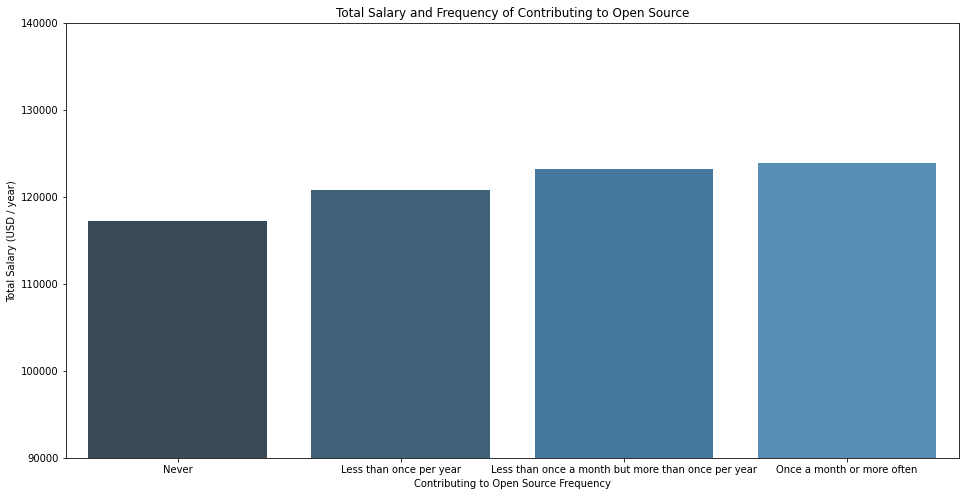

In [25]:
# Visualize the data
plt.figure(figsize=(16, 8))
sns.barplot(data=comp_per_category, x='OpenSourcer', y='ConvertedComp', palette=sns.color_palette("Blues_d"))
plt.ylim(90000,140000)
plt.title('Total Salary and Frequency of Contributing to Open Source')
plt.ylabel('Total Salary (USD / year)')
plt.xlabel('Contributing to Open Source Frequency')
plt.show()

The above visualization shows that developers frequently contributing to open source havev higher salary. People contributing at least once a month have 7% higher salary than the rest. Although this correlation does not mean if we want higher salary we need to start contributing to open source. That's because Correlation does not imply Causation.

This relationship could be due to the fact that developers with strong technical knowledge can contribute to open source more often. And as we know, the more skilled the developers, the higher their salary is. 


## Conclusion

The following is the summary of our deductions:

1.   **United States** has the **highest job satisfaction** level in the world. 5 out of the top 10 countries with the highest job satisfaction are located in **Europe**. 
2.   We categorized rerspondents into IT and non-IT major and found **developers with non-IT background were sligtly more satisfied**.
3.   Job satisfaction in  accordance to organization size were looked. We concluded that **sole proprietor** has **less** proportion of **unsatisfied **respondents and the **most satisfied** were respondents in  organization with **size 20-99 and 100-499 employees**. 
4.   In terms of salary, **developers** who regularly contribute to **open source have higher salary**.
